In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv("Hackathon_train.csv")
data

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N,TGD Consultancy Share price,TGD Automobiles Share price,TGD Power Share price
0,1700-01-01,502.52,498.78,493.98,947.6,505.24,79050.0,502.10,502.73,630.41,496.60,508.95,512.01,499.20,501.94,519.0,420.0,507.0
1,1700-01-02,503.33,495.09,496.93,928.6,506.21,31082.0,502.28,501.96,630.61,496.76,508.97,512.45,500.14,501.51,518.0,420.0,507.0
2,1700-01-03,500.62,493.71,504.75,935.5,505.51,19375.0,502.09,499.17,630.81,496.91,508.99,513.31,499.96,501.00,523.0,437.0,522.0
3,1700-01-04,502.08,492.98,502.20,923.5,505.25,22010.0,501.88,500.43,631.01,497.06,509.01,513.49,500.05,501.04,522.0,437.0,522.0
4,1700-01-05,502.81,493.23,499.57,918.1,504.86,26533.0,501.70,501.46,631.21,497.21,509.03,513.59,500.31,501.10,522.0,437.0,522.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161763,2142-11-23,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,498.0,420.0,507.0
161764,2142-11-24,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,502.0,420.0,507.0
161765,2142-11-25,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,508.0,420.0,507.0
161766,2142-11-26,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99,507.0,420.0,507.0


In [3]:
data.columns

Index(['dates', 'Factor A', 'Factor B', 'Factor C', 'Factor D', 'Factor E',
       'Factor F', 'Factor G', 'Factor H', 'Factor I', 'Factor J', 'Factor K',
       'Factor L', 'Factor M', 'Factor N', 'TGD Consultancy Share price',
       'TGD Automobiles Share price', 'TGD Power Share price'],
      dtype='object')

In [4]:
consultancy_data = data[['Factor A', 'Factor B', 'Factor C', 'Factor D', 'Factor E', 'Factor F', 'Factor G', 
                        'Factor H', 'Factor I', 'Factor J', 'Factor K', 'Factor L', 'Factor M', 'Factor N', 
                        'TGD Consultancy Share price']]
automobiles_data = data[['Factor A', 'Factor B', 'Factor C', 'Factor D', 'Factor E',
                       'Factor F', 'Factor G', 'Factor H', 'Factor I', 'Factor J', 'Factor K',
                       'Factor L', 'Factor M', 'Factor N','TGD Automobiles Share price']]
power_data = data[['Factor A', 'Factor B', 'Factor C', 'Factor D', 'Factor E',
                   'Factor F', 'Factor G', 'Factor H', 'Factor I', 'Factor J', 'Factor K',
                   'Factor L', 'Factor M', 'Factor N','TGD Power Share price']]

# Plots for TGD Consultancy Data

<AxesSubplot:>

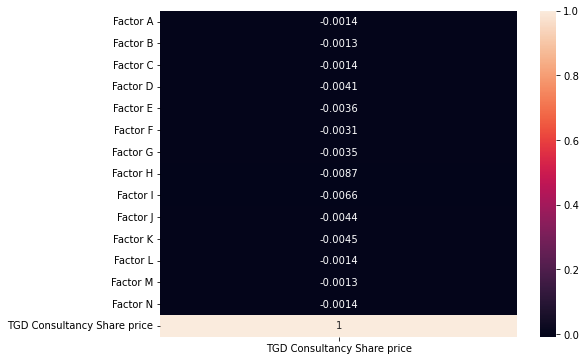

In [5]:
consultancy_corr = pd.DataFrame(consultancy_data.corr().iloc[:,-1])
plt.figure(figsize=(8,6))
sns.heatmap(consultancy_corr, annot=True)

### Factors H, and Factor I make more influence as compared to other parameters on TGD Consultancy Share Price

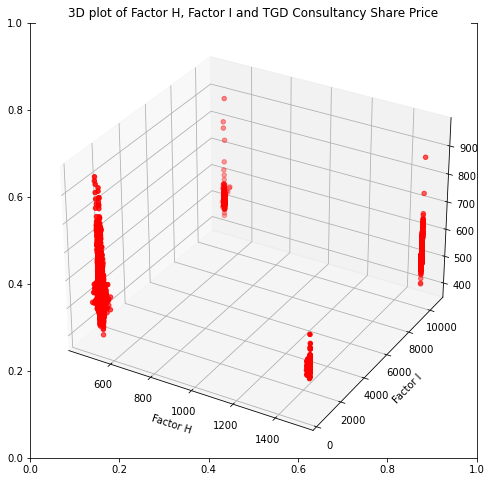

In [6]:
plt.figure(figsize=(8,8))
plt.title("3D plot of Factor H, Factor I and TGD Consultancy Share Price")
plt_axes = plt.axes(projection='3d')
plt_axes.scatter3D(consultancy_data['Factor H'], consultancy_data['Factor I'], 
                   consultancy_data['TGD Consultancy Share price'], color = 'red')
plt.xlabel('Factor H')
plt.ylabel('Factor I')
plt.show()

# Plots for Automobile data

<AxesSubplot:>

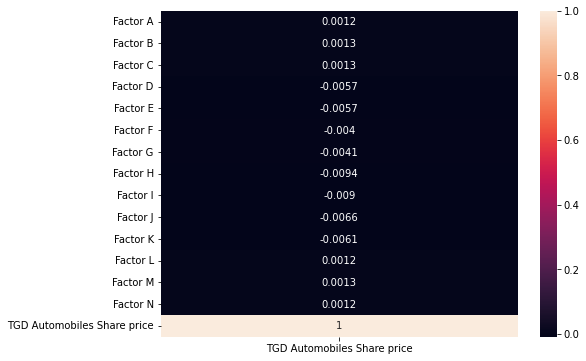

In [7]:
automobiles_corr = pd.DataFrame(automobiles_data.corr().iloc[:,-1])
plt.figure(figsize=(8,6))
sns.heatmap(automobiles_corr, annot=True)

### Factor H, Factor I make more influence on TGD Automobile Share Price

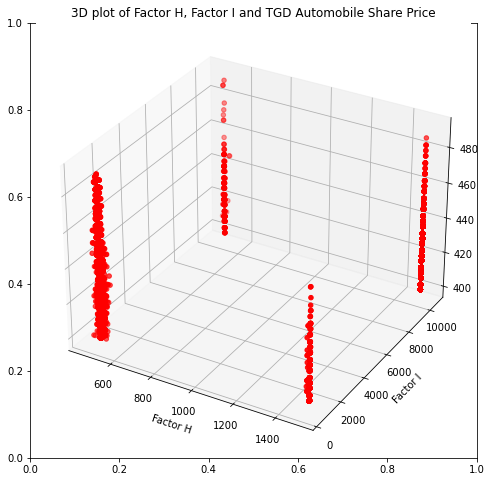

In [8]:
plt.figure(figsize=(8,8))
plt.title("3D plot of Factor H, Factor I and TGD Automobile Share Price")
plt_axes = plt.axes(projection='3d')
plt_axes.scatter3D(automobiles_data['Factor H'], automobiles_data['Factor I'], 
                   automobiles_data['TGD Automobiles Share price'], color = 'red')
plt.xlabel('Factor H')
plt.ylabel('Factor I')
plt.show()

# Plots for TGD Power Share Prices

<AxesSubplot:>

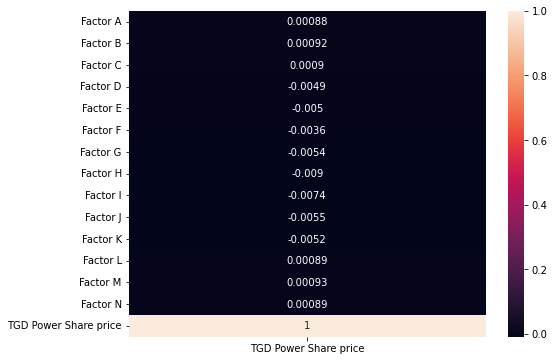

In [9]:
power_corr = pd.DataFrame(power_data.corr().iloc[:,-1])
plt.figure(figsize=(8,6))
sns.heatmap(power_corr, annot=True)

### Factor B, and Factor M influence more on the TGD Power dataset

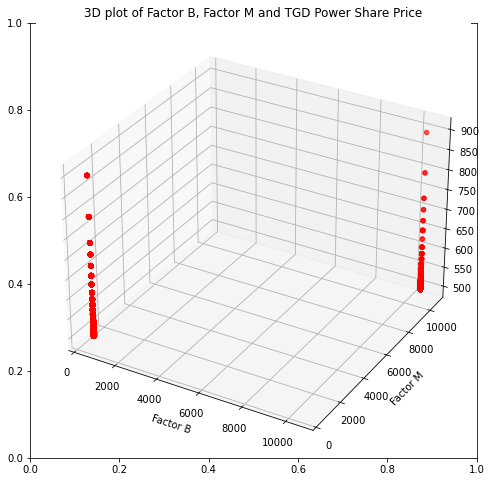

In [10]:
plt.figure(figsize=(8,8))
plt.title("3D plot of Factor B, Factor M and TGD Power Share Price")
plt_axes = plt.axes(projection='3d')
plt_axes.scatter3D(power_data['Factor B'], power_data['Factor M'], 
                   power_data['TGD Power Share price'], color = 'red')
plt.xlabel('Factor B')
plt.ylabel('Factor M')
plt.show()

# Hence, we can't Use Multiple Linear Regression Model

In [5]:
x = data[['Factor A', 'Factor B', 'Factor C', 'Factor D', 'Factor E',
       'Factor F', 'Factor G', 'Factor H', 'Factor I', 'Factor J', 'Factor K',
       'Factor L', 'Factor M', 'Factor N']]
y_consult = data['TGD Consultancy Share price']
y_auto = data['TGD Automobiles Share price']
y_power = data['TGD Power Share price']

## Finding relation between three Subsidiary Share Prices

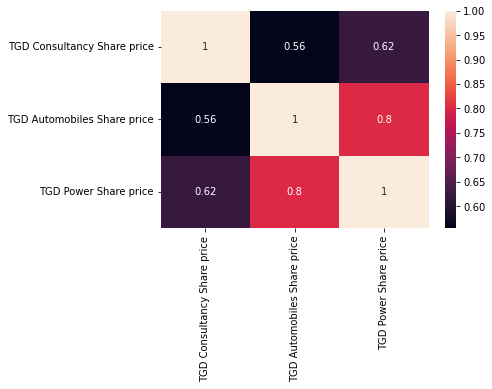

In [12]:
y_combined = pd.concat([y_consult, y_auto, y_power], axis = 1)
y_combined_corr = y_combined.corr()
plt.figure(figsize=(6,4))
sns.heatmap(y_combined_corr, annot=True)
plt.show()

In [13]:
x_train_consult, x_test_consult, y_train_consult, y_test_consult = train_test_split(x, y_consult, test_size=0.33)
scaler = MinMaxScaler()
x_train_scaled_consult = pd.DataFrame(scaler.fit_transform(x_train_consult))
x_train_scaled_consult

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.004137,0.002725,0.005143,0.000824,0.009201,0.003130,0.018207,0.030466,0.029003,0.039180,0.003354,0.000877,0.000904,0.000695
1,0.004410,0.003167,0.004754,0.002122,0.002270,0.008021,0.009104,0.030262,0.027361,0.030346,0.002584,0.000952,0.000938,0.000708
2,0.003908,0.003741,0.005169,0.001199,0.000600,0.001459,0.001401,0.028817,0.028614,0.035242,0.001829,0.001666,0.000844,0.000684
3,0.003789,0.003336,0.005221,0.002271,0.001990,0.010282,0.008503,0.028749,0.027961,0.027604,0.002975,0.000980,0.000805,0.000699
4,0.004390,0.003673,0.004703,0.001433,0.002650,0.000917,0.007503,0.031019,0.028916,0.027448,0.001621,0.001014,0.000897,0.000636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108379,0.003950,0.003286,0.004932,0.001226,0.004080,0.004615,0.010304,0.029874,0.025146,0.035927,0.001265,0.000958,0.000821,0.000686
108380,0.004799,0.002913,0.005116,0.002417,0.004130,0.002102,0.018808,0.028255,0.028297,0.027435,0.004212,0.000833,0.000902,0.000560
108381,0.004420,0.003231,0.004731,0.004505,0.001850,0.029160,0.017907,0.031494,0.027936,0.027703,0.001824,0.000822,0.000889,0.000646
108382,0.003315,0.003303,0.008703,0.005824,0.004240,0.012474,0.057223,0.000000,0.029288,0.033419,0.001308,0.000896,0.000888,0.000736


# Consulting Predictions

### Model 1: Using Neural Networks

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [15]:
model1 = Sequential([tf.keras.Input(shape=x_train_scaled_consult.shape[1]),
                    Dense(units=350, kernel_initializer='normal', activation='relu', name = 'layer1'),
                    Dense(units=256, kernel_initializer='normal', activation='relu', name = 'layer2'),
                    Dense(units=125, kernel_initializer='normal', activation='relu', name = 'layer3'),
                    Dense(units=1, kernel_initializer='normal', activation = 'linear', name = 'output_layer')])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 350)               5250      
                                                                 
 layer2 (Dense)              (None, 256)               89856     
                                                                 
 layer3 (Dense)              (None, 125)               32125     
                                                                 
 output_layer (Dense)        (None, 1)                 126       
                                                                 
Total params: 127,357
Trainable params: 127,357
Non-trainable params: 0
_________________________________________________________________


In [16]:
model1.compile(optimizer=Adam(0.01), loss=tf.keras.losses.MeanSquaredError())
history1 = model1.fit(x_train_scaled_consult, y_train_consult, epochs = 20, batch_size = 50)

Epoch 1/20
2168/2168 [==============================] - 9s 3ms/step - loss: 2277.5964
Epoch 2/20
2168/2168 [==============================] - 6s 3ms/step - loss: 483.3372
Epoch 3/20
2168/2168 [==============================] - 7s 3ms/step - loss: 481.1633
Epoch 4/20
2168/2168 [==============================] - 7s 3ms/step - loss: 463.0514
Epoch 5/20
2168/2168 [==============================] - 6s 3ms/step - loss: 435.4330
Epoch 6/20
2168/2168 [==============================] - 7s 3ms/step - loss: 441.1188
Epoch 7/20
2168/2168 [==============================] - 6s 3ms/step - loss: 419.8419
Epoch 8/20
2168/2168 [==============================] - 7s 3ms/step - loss: 423.1755
Epoch 9/20
2168/2168 [==============================] - 6s 3ms/step - loss: 419.7386
Epoch 10/20
2168/2168 [==============================] - 8s 3ms/step - loss: 417.3454
Epoch 11/20
2168/2168 [==============================] - 7s 3ms/step - loss: 413.0535
Epoch 12/20
2168/2168 [==============================] - 6s 3m

In [17]:
loss1 = (np.array(history1.history.get('loss')))
loss1

array([2277.59643555,  483.33721924,  481.16333008,  463.05142212,
        435.43295288,  441.11883545,  419.84191895,  423.17547607,
        419.73864746,  417.34536743,  413.0534668 ,  417.20263672,
        414.26361084,  409.86447144,  408.60162354,  405.87887573,
        404.19876099,  402.16921997,  408.43515015,  401.22143555])

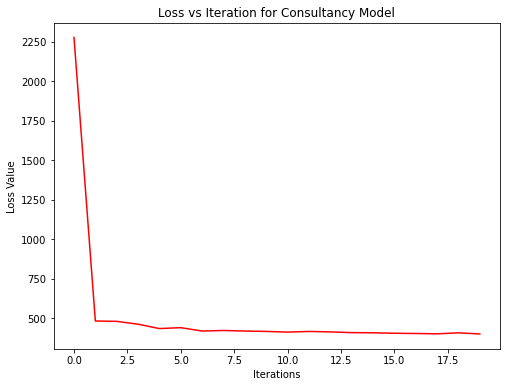

In [18]:
plt.figure(figsize=(8,6))
plt.plot(loss1, color = 'red')
plt.title('Loss vs Iteration for Consultancy Model')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.show()

In [19]:
x_test_scaled_consult = scaler.transform(x_test_consult)
x_test_scaled_consult

array([[0.00398129, 0.00323479, 0.00438416, ..., 0.0009274 , 0.00070946,
        0.00090625],
       [0.00407888, 0.00316004, 0.00476535, ..., 0.00100743, 0.00066149,
        0.00082832],
       [0.00389665, 0.00400711, 0.00493753, ..., 0.00086237, 0.00074643,
        0.00076237],
       ...,
       [0.00371242, 0.0033444 , 0.00445383, ..., 0.00084036, 0.0006545 ,
        0.00075638],
       [0.00435771, 0.003749  , 0.00484597, ..., 0.00091739, 0.00077141,
        0.00089826],
       [0.00416452, 0.00295874, 0.00411843, ..., 0.00067829, 0.00065849,
        0.00075638]])

In [20]:
predict_consult = model1.predict(x_test_scaled_consult)
predict_consult

1669/1669 [==============================] - 4s 2ms/step


array([[513.1162],
       [511.8773],
       [515.0773],
       ...,
       [514.0884],
       [511.8441],
       [515.5085]], dtype=float32)

In [21]:
mse = mean_squared_error(y_test_consult, predict_consult)
rmse = (mse)**(1/2)
rmse

19.693773683412747

In [22]:
r2_score(y_test_consult, predict_consult)

-0.000841237504607184

### Model 2 : Using Random Forest Regressor

In [23]:
tree = RandomForestRegressor()
tree.fit(x_train_scaled_consult, y_train_consult)

RandomForestRegressor()

In [24]:
predict_consult = tree.predict(x_test_scaled_consult)
predict_consult

array([518.42, 518.58, 514.06, ..., 504.35, 515.56, 510.93])

In [25]:
mse1 = mean_squared_error(y_test_consult, predict_consult)
rmse1 = (mse1)**(1/2)
rmse1

12.480825759288626

In [63]:
score1 = r2_score(y_test_consult, predict_consult)
score1

0.5980297184664096

# Automobile Predictions

In [27]:
x_train_auto, x_test_auto, y_train_auto, y_test_auto = train_test_split(x, y_auto, test_size=0.33)
scaler = MinMaxScaler()
x_train_scaled_auto = pd.DataFrame(scaler.fit_transform(x_train_auto))
x_train_scaled_auto

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.004195,0.004300,0.005778,0.001871,0.014781,0.006195,0.052321,0.030512,0.030658,0.033505,0.004651,0.000746,0.001025,0.000859
1,0.003749,0.003622,0.004792,0.002428,0.002780,0.005951,0.012605,0.035569,0.027641,0.030917,0.005106,0.000960,0.000843,0.000853
2,0.004000,0.003382,0.004528,0.001960,0.013411,0.007110,0.049420,0.036592,0.029761,0.030698,0.000650,0.000667,0.000961,0.000755
3,0.003558,0.003697,0.005023,0.001913,0.003090,0.006833,0.011104,0.034835,0.025688,0.038343,0.001540,0.000994,0.000786,0.000914
4,0.003907,0.003998,0.004962,0.000896,0.004440,0.001891,0.009104,0.034170,0.024747,0.035745,0.001221,0.001093,0.000872,0.000848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108379,0.004287,0.003907,0.004998,0.001611,0.006391,0.003113,0.019808,0.034951,0.030013,0.031718,0.003628,0.000892,0.000936,0.000929
108380,0.004025,0.003693,0.004764,0.000887,0.020562,0.002326,0.042617,0.035579,0.024720,0.027253,0.002114,0.000732,0.000822,0.000873
108381,0.004408,0.003098,0.004849,0.000931,0.033583,0.002257,0.071629,0.034816,0.028839,0.040335,0.003006,0.000658,0.000885,0.000796
108382,0.004253,0.003731,0.004670,0.004844,0.002270,0.026343,0.023810,0.037248,0.031254,0.029196,0.004002,0.000803,0.000905,0.000777


### Model 3 : Using Neural Networks

In [28]:
model3 = Sequential([tf.keras.Input(shape=x_train_scaled_auto.shape[1]),
                    Dense(units=350, kernel_initializer='normal', activation='relu', name = 'layer1'),
                    Dense(units=256, kernel_initializer='normal', activation='relu', name = 'layer2'),
                    Dense(units=125, kernel_initializer='normal', activation='relu', name = 'layer3'),
                    Dense(units=1, kernel_initializer='normal', activation = 'linear', name = 'output_layer')])
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 350)               5250      
                                                                 
 layer2 (Dense)              (None, 256)               89856     
                                                                 
 layer3 (Dense)              (None, 125)               32125     
                                                                 
 output_layer (Dense)        (None, 1)                 126       
                                                                 
Total params: 127,357
Trainable params: 127,357
Non-trainable params: 0
_________________________________________________________________


In [29]:
model3.compile(optimizer=Adam(0.01), loss=tf.keras.losses.MeanSquaredError())
history3 = model3.fit(x_train_scaled_auto, y_train_auto, epochs = 20, batch_size = 50)

Epoch 1/20
2168/2168 [==============================] - 8s 3ms/step - loss: 1261.3003
Epoch 2/20
2168/2168 [==============================] - 6s 3ms/step - loss: 245.3060
Epoch 3/20
2168/2168 [==============================] - 7s 3ms/step - loss: 237.3998
Epoch 4/20
2168/2168 [==============================] - 6s 3ms/step - loss: 222.5675
Epoch 5/20
2168/2168 [==============================] - 7s 3ms/step - loss: 222.4268
Epoch 6/20
2168/2168 [==============================] - 7s 3ms/step - loss: 215.8394
Epoch 7/20
2168/2168 [==============================] - 6s 3ms/step - loss: 212.3341
Epoch 8/20
2168/2168 [==============================] - 7s 3ms/step - loss: 208.2334
Epoch 9/20
2168/2168 [==============================] - 6s 3ms/step - loss: 206.7908
Epoch 10/20
2168/2168 [==============================] - 7s 3ms/step - loss: 207.5006
Epoch 11/20
2168/2168 [==============================] - 7s 3ms/step - loss: 205.8699
Epoch 12/20
2168/2168 [==============================] - 6s 3m

In [30]:
loss3 = (np.array(history3.history.get('loss')))
loss3

array([1261.30029297,  245.3059845 ,  237.39984131,  222.56752014,
        222.42683411,  215.83938599,  212.3341217 ,  208.23344421,
        206.79083252,  207.50056458,  205.86988831,  203.94781494,
        201.58882141,  201.31365967,  199.41912842,  198.1131897 ,
        202.39476013,  198.08122253,  198.91148376,  198.60865784])

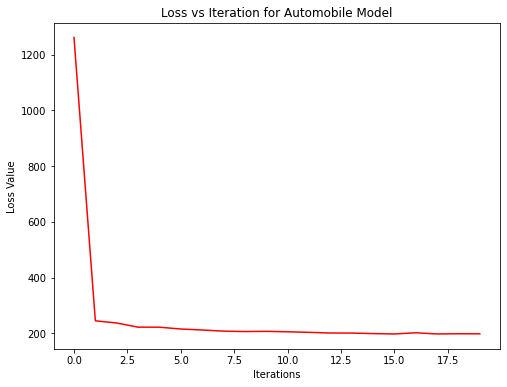

In [31]:
plt.figure(figsize=(8,6))
plt.plot(loss3, color = 'red')
plt.title('Loss vs Iteration for Automobile Model')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.show()

In [32]:
x_test_scaled_auto = scaler.transform(x_test_auto)
x_test_scaled_auto

array([[0.00440873, 0.0032607 , 0.00527697, ..., 0.00091639, 0.00085619,
        0.00080634],
       [0.00382216, 0.00378687, 0.00522025, ..., 0.00106245, 0.00081723,
        0.00081033],
       [0.00323061, 0.00367326, 0.00324798, ..., 0.0004602 , 0.00093711,
        0.00085629],
       ...,
       [0.00387793, 0.00390845, 0.00524314, ..., 0.0011795 , 0.00080724,
        0.00086928],
       [0.00394963, 0.00395329, 0.00507397, ..., 0.00105545, 0.00092113,
        0.00093423],
       [0.00442367, 0.00316204, 0.00496551, ..., 0.00098542, 0.00083921,
        0.00082032]])

In [33]:
predict_auto = model3.predict(x_test_scaled_auto)
predict_auto

1669/1669 [==============================] - 2s 1ms/step


array([[416.04584],
       [414.29083],
       [419.77313],
       ...,
       [413.04565],
       [413.82935],
       [414.2121 ]], dtype=float32)

In [34]:
mse = mean_squared_error(y_test_auto, predict_auto)
rmse = (mse)**(1/2)
rmse

14.024818507777047

### Model 4 : Using Random Forest Regressor

In [35]:
model4 = RandomForestRegressor()
model4.fit(x_train_scaled_auto, y_train_auto)

RandomForestRegressor()

In [36]:
predict_auto = model4.predict(x_test_scaled_auto)
predict_auto

array([410.21, 407.5 , 417.3 , ..., 414.43, 409.  , 413.69])

In [37]:
mse2 = mean_squared_error(y_test_auto, predict_auto)
rmse2 = (mse2)**(1/2)
rmse2

8.587238116164132

In [64]:
score2 = r2_score(y_test_auto, predict_auto)
score2

0.6083539961949828

# Power Share Predictions

In [38]:
x_train_power, x_test_power, y_train_power, y_test_power = train_test_split(x, y_power, test_size=0.33)
scaler = MinMaxScaler()
x_train_scaled_power = pd.DataFrame(scaler.fit_transform(x_train_power))
x_train_scaled_power

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.004128,0.003097,0.004698,0.003308,0.005400,0.015225,0.034514,0.035250,0.027529,0.041238,0.002379,0.000775,0.000959,0.000862
1,0.003803,0.003584,0.004600,0.001578,0.005910,0.005560,0.018007,0.035964,0.030385,0.025850,0.004272,0.000889,0.000891,0.000793
2,0.004177,0.003734,0.004976,0.001873,0.003280,0.005464,0.011605,0.033899,0.030011,0.032158,0.002454,0.001000,0.000912,0.000858
3,0.004225,0.002991,0.004701,0.003680,0.001890,0.013415,0.013806,0.035636,0.027989,0.034569,0.005081,0.000966,0.000918,0.000884
4,0.003883,0.003654,0.004384,0.001778,0.008801,0.013916,0.029712,0.035974,0.029190,0.029868,0.005231,0.000733,0.000825,0.000812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108379,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
108380,0.003874,0.003595,0.004821,0.001225,0.004310,0.001431,0.010804,0.035096,0.030218,0.025441,0.004258,0.001009,0.000938,0.000725
108381,0.004169,0.002935,0.004644,0.001037,0.011221,0.003628,0.025510,0.036013,0.029844,0.032284,0.000717,0.000838,0.000899,0.000950
108382,0.004019,0.003639,0.004904,0.001668,0.004220,0.005354,0.013505,0.034546,0.028792,0.035033,0.002321,0.000952,0.000850,0.000910


### Model 5 : Neural Network

In [39]:
model5 = Sequential([tf.keras.Input(shape=x_train_scaled_power.shape[1]),
                    Dense(units=350, kernel_initializer='normal', activation='relu', name = 'layer1'),
                    Dense(units=256, kernel_initializer='normal', activation='relu', name = 'layer2'),
                    Dense(units=125, kernel_initializer='normal', activation='relu', name = 'layer3'),
                    Dense(units=1, kernel_initializer='normal', activation = 'linear', name = 'output_layer')])
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 350)               5250      
                                                                 
 layer2 (Dense)              (None, 256)               89856     
                                                                 
 layer3 (Dense)              (None, 125)               32125     
                                                                 
 output_layer (Dense)        (None, 1)                 126       
                                                                 
Total params: 127,357
Trainable params: 127,357
Non-trainable params: 0
_________________________________________________________________


In [40]:
model5.compile(optimizer=Adam(0.01), loss=tf.keras.losses.MeanSquaredError())
history5 = model5.fit(x_train_scaled_power, y_train_power, epochs = 20, batch_size = 50)

Epoch 1/20
2168/2168 [==============================] - 8s 3ms/step - loss: 2128.4951
Epoch 2/20
2168/2168 [==============================] - 8s 3ms/step - loss: 351.4038
Epoch 3/20
2168/2168 [==============================] - 7s 3ms/step - loss: 342.7775
Epoch 4/20
2168/2168 [==============================] - 8s 3ms/step - loss: 337.2961
Epoch 5/20
2168/2168 [==============================] - 7s 3ms/step - loss: 322.3438
Epoch 6/20
2168/2168 [==============================] - 7s 3ms/step - loss: 319.9523
Epoch 7/20
2168/2168 [==============================] - 7s 3ms/step - loss: 314.8787
Epoch 8/20
2168/2168 [==============================] - 7s 3ms/step - loss: 317.9703
Epoch 9/20
2168/2168 [==============================] - 8s 4ms/step - loss: 309.5098
Epoch 10/20
2168/2168 [==============================] - 7s 3ms/step - loss: 305.6110
Epoch 11/20
2168/2168 [==============================] - 8s 4ms/step - loss: 302.8687
Epoch 12/20
2168/2168 [==============================] - 7s 3m

In [41]:
loss5 = (np.array(history5.history.get('loss')))
loss5

array([2128.49511719,  351.40380859,  342.77749634,  337.29605103,
        322.34378052,  319.95227051,  314.87869263,  317.97027588,
        309.50976562,  305.61096191,  302.86871338,  305.07330322,
        298.51763916,  295.20046997,  293.9034729 ,  292.55526733,
        296.07632446,  291.91912842,  291.97998047,  290.37634277])

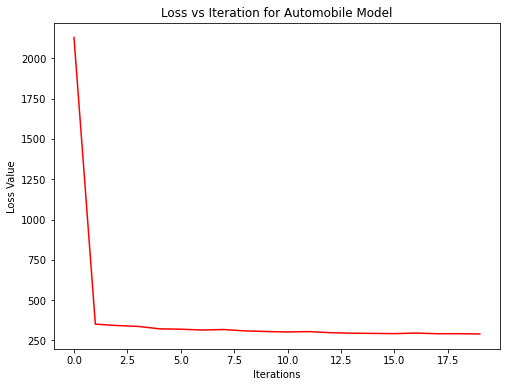

In [42]:
plt.figure(figsize=(8,6))
plt.plot(loss5, color = 'red')
plt.title('Loss vs Iteration for Automobile Model')
plt.xlabel('Iterations')
plt.ylabel('Loss Value')
plt.show()

In [43]:
x_test_scaled_power = scaler.transform(x_test_power)
x_test_scaled_power

array([[4.54317309e-03, 3.32771903e-03, 4.72137987e-03, ...,
        9.75416503e-04, 8.32211895e-04, 8.21323230e-04],
       [4.16573719e-03, 3.12141839e-03, 5.03587313e-03, ...,
        1.03244085e-03, 8.31212841e-04, 7.43387449e-04],
       [3.70663969e-03, 3.42937442e-03, 4.73332265e-03, ...,
        9.07387454e-04, 8.89157967e-04, 8.38309233e-04],
       ...,
       [4.18665052e-03, 3.79812436e-03, 4.99705909e-03, ...,
        8.17349008e-04, 8.81165536e-04, 8.32314173e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [4.44059816e-03, 3.51209400e-03, 4.61887099e-03, ...,
        9.07387454e-04, 8.26217572e-04, 7.98342166e-04]])

In [44]:
predict_power = model5.predict(x_test_scaled_power)
predict_power

1669/1669 [==============================] - 3s 1ms/step


array([[508.86835],
       [507.60266],
       [509.59842],
       ...,
       [507.96667],
       [503.57205],
       [506.72174]], dtype=float32)

In [45]:
mse = mean_squared_error(y_test_power, predict_power)
rmse = (mse)**(1/2)
rmse

15.757650881784748

### Model 6 : Random Forest Regressor

In [46]:
model6 = RandomForestRegressor()
model6.fit(x_train_scaled_power, y_train_power)

RandomForestRegressor()

In [47]:
predict_power = model6.predict(x_test_scaled_power)
predict_power

array([503.62      , 505.59      , 503.22      , ..., 507.75      ,
       510.27904953, 504.43      ])

In [48]:
mse3 = mean_squared_error(y_test_power, predict_power)
rmse3 = (mse)**(1/2)
rmse3

15.757650881784748

In [65]:
score3 = r2_score(y_test_power, predict_power)
score3

0.5623797681344902

In [66]:
net_RMSE = (rmse1 + rmse2 + rmse3)/3
net_RMSE

12.275238252412501

In [69]:
Net_Accuracy = (score1 + score2 + score3)*100/3
print(Net_Accuracy, "%")

58.95878275986275 %


# Uncertainity value for Combined Predictions

In [70]:
uncertainity_value = 100 - Net_Accuracy
print(uncertainity_value, "%")

41.04121724013725 %


# Selecting best Model for Final Predictions:
Now that we have used two different approaches for predictions, which are Neural Network and Random Forest Regressor, it has been found that Random Forest Regressor best fits the data, giving least value of RMSE.
Hence we will be using Random Forest Regressor for making final models for all three subsidiaries.

In [6]:
scaler2 = MinMaxScaler()
x_scaled = pd.DataFrame(scaler2.fit_transform(x))
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.004431,0.003334,0.004311,0.002169,0.00517,0.007605,0.020708,0.037672,0.018159,0.030946,0.003690,0.000775,0.000867,0.001018
1,0.004512,0.002967,0.004604,0.001979,0.00614,0.002807,0.022509,0.036929,0.018179,0.030961,0.003692,0.000819,0.000961,0.000975
2,0.004242,0.002829,0.005382,0.002048,0.00544,0.001636,0.020608,0.034237,0.018199,0.030976,0.003694,0.000905,0.000943,0.000924
3,0.004388,0.002756,0.005129,0.001927,0.00518,0.001900,0.018507,0.035453,0.018219,0.030991,0.003696,0.000923,0.000952,0.000928
4,0.004460,0.002781,0.004867,0.001873,0.00479,0.002352,0.016707,0.036447,0.018239,0.031005,0.003698,0.000933,0.000978,0.000934


In [7]:
consultant_model = RandomForestRegressor()
consultant_model.fit(x_scaled, y_consult)

RandomForestRegressor()

In [8]:
automobile_model = RandomForestRegressor()
automobile_model.fit(x_scaled, y_auto)

RandomForestRegressor()

In [9]:
power_model = RandomForestRegressor()
power_model.fit(x_scaled, y_power)

RandomForestRegressor()

In [10]:
prediction_data = pd.read_csv('Hackathon_test.csv')
prediction_data.head()

,dates,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,2142-11-28,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
1,2142-11-29,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2,2142-11-30,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
3,2142-12-01,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
4,2142-12-02,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44


In [11]:
prediction_data.drop(columns = 'dates', inplace=True)
prediction_data.head()

,Factor A,Factor B,Factor C,Factor D,Factor E,Factor F,Factor G,Factor H,Factor I,Factor J,Factor K,Factor L,Factor M,Factor N
0,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
1,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
2,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
3,10499.99,10499.99,10499.99,100499.9,1499.99,10000500.0,599.99,1499.99,10499.99,10499.99,10499.99,10499.99,10499.99,10499.99
4,503.94,497.55,499.63,894.7,502.82,94705.0,500.88,499.93,736.35,596.33,498.68,514.90,499.69,500.44


In [14]:
prediction_data_scaled = pd.DataFrame(scaler.transform(prediction_data))
prediction_data_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.004573,0.003135,0.004873,0.001611,0.00273,0.009171,0.008503,0.029991,0.028698,0.040607,0.002666,0.001001,0.000916,0.000713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.004262,0.004045,0.004999,0.001601,0.00412,0.023041,0.012705,0.029322,0.028690,0.039643,0.003590,0.000937,0.000645,0.000747
29996,0.004127,0.003757,0.005452,0.001798,0.00412,0.017754,0.014106,0.027692,0.028694,0.039636,0.003591,0.000922,0.000757,0.000774
29997,0.004364,0.003831,0.005422,0.001703,0.00381,0.019101,0.012405,0.027595,0.028701,0.039629,0.003593,0.000960,0.000712,0.000690
29998,0.003822,0.003903,0.004951,0.001955,0.00307,0.016459,0.011305,0.029642,0.028704,0.039625,0.003593,0.000964,0.000774,0.000829


In [15]:
prediction_data_scaled.rename(columns = {'Factor A' : 0, 'Factor B' : 1, 'Factor C': 2, 'Factor D': 3, 'Factor E': 4,
       'Factor F': 5, 'Factor G': 6, 'Factor H': 7, 'Factor I': 8, 'Factor J': 9, 'Factor K': 10,
       'Factor L': 11, 'Factor M': 12, 'Factor N': 13}, inplace = True)

# Consultancy Final Predictions

In [16]:
consultant_predict = consultant_model.predict(prediction_data_scaled)
consultant_predict

array([511.27294196, 511.27294196, 511.27294196, ..., 514.78      ,
       509.8       , 513.43      ])

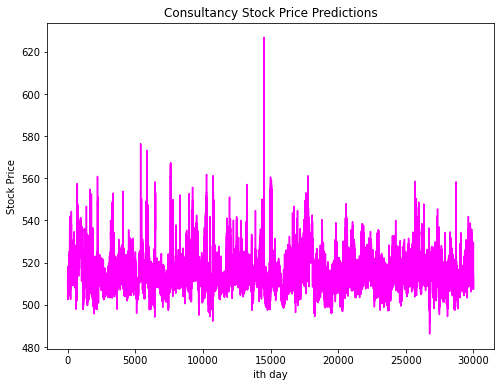

In [29]:
plt.figure(figsize=(8,6))
plt.plot(consultant_predict, color= 'magenta')
plt.xlabel('ith day')
plt.ylabel('Stock Price')
plt.title('Consultancy Stock Price Predictions')
plt.show()

# Automobile Final Predicitons

In [17]:
automobile_predict = automobile_model.predict(prediction_data_scaled)
automobile_predict

array([417.97932499, 417.97932499, 417.97932499, ..., 423.31      ,
       416.76      , 418.43      ])

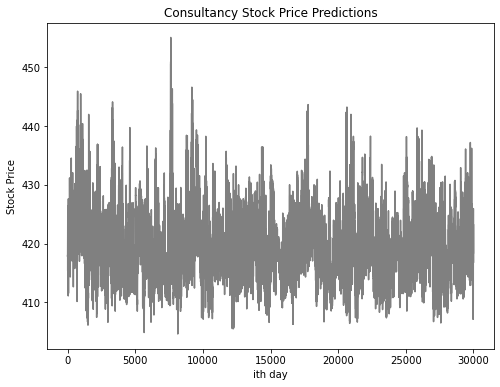

In [31]:
plt.figure(figsize=(8,6))
plt.plot(automobile_predict, color= 'grey')
plt.xlabel('ith day')
plt.ylabel('Stock Price')
plt.title('Consultancy Stock Price Predictions')
plt.show()

# Power Final Predictions

In [18]:
power_predict = power_model.predict(prediction_data_scaled)
power_predict

array([510.02404296, 510.02404296, 510.02404296, ..., 512.05      ,
       507.77      , 509.34      ])

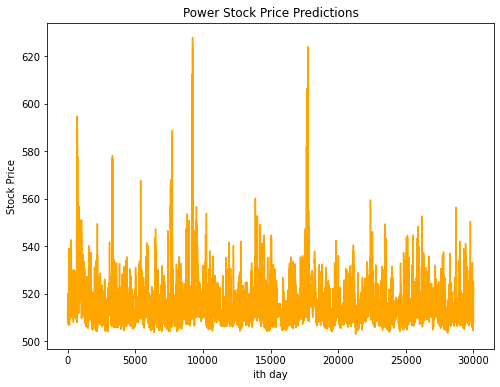

In [26]:
plt.figure(figsize=(8,6))
plt.plot(power_predict, color= 'orange')
plt.xlabel('ith day')
plt.ylabel('Stock Price')
plt.title('Power Stock Price Predictions')
plt.show()

# Combining all the values

In [19]:
y_values_final = (pd.DataFrame([consultant_predict + automobile_predict + power_predict]))
y_values_final= y_values_final.T
y_values_final.rename(columns = {0:'predicted'}, inplace=True)
y_values_final

,predicted
0,1439.27631
1,1439.27631
2,1439.27631
3,1439.27631
4,1435.14000
...,...
29995,1456.36000
29996,1436.59000
29997,1450.14000
29998,1434.33000


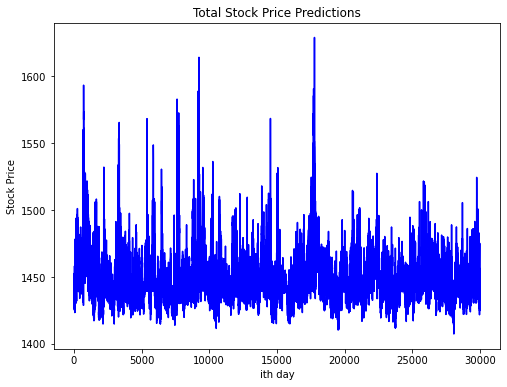

In [27]:
plt.figure(figsize=(8,6))
plt.plot(y_values_final, color = 'blue')
plt.xlabel('ith day')
plt.ylabel('Stock Price')
plt.title('Total Stock Price Predictions')
plt.show()